# Model v5
Anthony Lee 2025-01-04


- Decreasing the batch size from 10 to 5 helped iwth increasing the speed and also GPU wattage.

In [1]:
# from gan.gan import CycleGAN
# from gan.utility_training import train_one_epoch
# from gan.utility_checkpoint import checkpoint_save
# from gan.data import ImageDataset, ImageDataLoader
# import torch
# from pprint import pprint
# from gan.utility_plotting import plot_before_after
# from gan.utility_data import map_tanh_to_rgb, map_rgb_to_tanh
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# print( torch.cuda.get_device_properties(device) )

# ## Get the dataset and dataloader
# monet_dataset = ImageDataset(data_dir="../data/gan-getting-started/monet_jpg")
# photo_dataset = ImageDataset(data_dir="../data/gan-getting-started/photo_jpg")

# monet_dataloader = ImageDataLoader(monet_dataset)
# photo_dataloader = ImageDataLoader(photo_dataset)

# ## Instantiate the model and optimizers
# model = CycleGAN()
# monet_gen_optim = torch.optim.Adam(model.monet_gen.parameters(), lr=2e-4, betas=(0.5, 0.999))
# photo_gen_optim = torch.optim.Adam(model.photo_gen.parameters(), lr=2e-4, betas=(0.5, 0.999))
# monet_dis_optim = torch.optim.Adam(model.monet_dis.parameters(), lr=2e-4, betas=(0.5, 0.999))
# photo_dis_optim = torch.optim.Adam(model.photo_dis.parameters(), lr=2e-4, betas=(0.5, 0.999))
# epoch_count = 20

# ## Training loop
# for idx_epoch in range(epoch_count):

#     loss_tracker = train_one_epoch(monet_dataloader=monet_dataloader, 
#                     photo_dataloader=photo_dataloader,
#                     monet_gen_optim=monet_gen_optim,
#                     photo_gen_optim=photo_gen_optim,
#                     monet_dis_optim=monet_dis_optim,
#                     photo_dis_optim=photo_dis_optim,
#                     model=model, 
#                     device=device)
    
#     # Plot an example image
#     idx = 20

#     # Photo to monet
#     input = photo_dataset[idx].to(device=device)
#     output = model.generate_monet(input)  # Need to move to CPU?
#     output = map_tanh_to_rgb(output)
#     fig1 = plot_before_after(input, output, suptitle=f"Epoch {idx_epoch}: Photo -> Monet")
#     fig1.show()

#     # Monet to photo
#     input = monet_dataset[idx].to(device=device)
#     output = model.generate_photo(input) # Need to move to CPU?
#     output = map_tanh_to_rgb(output)
#     fig2 = plot_before_after(input, output, suptitle=f"Epoch {idx_epoch}: Monet -> Photo")
#     fig2.show()

#     # Checkpoint save
#     if idx_epoch % 2 == 0:
#         fig1.savefig(f"./epoch_{idx_epoch}_fake_monet.jpg")
#         fig2.savefig(f"./epoch_{idx_epoch}_fake_photo.jpg")
#         _ = checkpoint_save(epoch=idx_epoch, 
#                     save_path=".", 
#                     model=model,
#                     monet_gen_optim=monet_gen_optim,
#                     photo_gen_optim=photo_gen_optim,
#                     monet_dis_optim=monet_dis_optim,
#                     photo_dis_optim=photo_dis_optim,
#                     loss_tracker=loss_tracker)
    

_CudaDeviceProperties(name='NVIDIA GeForce RTX 3070', major=8, minor=6, total_memory=8191MB, multi_processor_count=46, uuid=0e2d35a6-9344-fc39-0a99-bd4343293f22, L2_cache_size=4MB)
img_tensor.size(): torch.Size([3, 256, 256])
(min, max): (0.0, 0.9529411792755127)


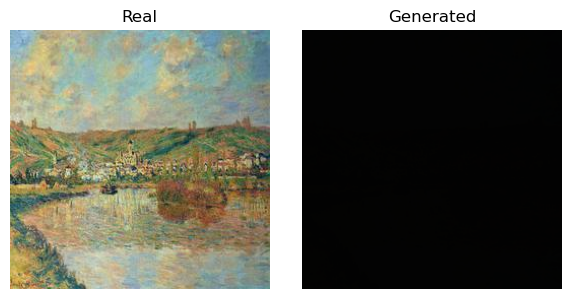

In [9]:
from gan.gan import CycleGAN
from gan.utility_training import train_one_epoch
from gan.utility_checkpoint import checkpoint_save
from gan.data import ImageDataset, ImageDataLoader
import torch
from pprint import pprint
from gan.utility_plotting import plot_before_after
from gan.utility_data import map_tanh_to_rgb, map_rgb_to_tanh
import numpy as np

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print( torch.cuda.get_device_properties(device) )

# Get the dataset and dataloader
monet_dataset = ImageDataset(data_dir="../data/gan-getting-started/monet_jpg")
photo_dataset = ImageDataset(data_dir="../data/gan-getting-started/photo_jpg")

monet_dataloader = ImageDataLoader(monet_dataset)
photo_dataloader = ImageDataLoader(photo_dataset)


data = monet_dataset
idx = np.random.randint(len(data))
img_tensor = data[idx].float() / 255
print(f"img_tensor.size(): {img_tensor.size()}")

print(f"(min, max): ({img_tensor.min()}, {img_tensor.max()})")

fig = plot_before_after(real=img_tensor, generated=map_rgb_to_tanh(img_tensor))
fig.show()

In [3]:
# import numpy as np
# idx = np.random.randint(0, 300, 1).item()

# # Photo to monet
# input = photo_dataset[idx].to(device=device)
# output = model.generate_monet(input)  # Need to move to CPU?
# output = map_tanh_to_rgb(output)
# fig1 = plot_before_after(input, output, suptitle=f"Epoch {idx_epoch}: Photo -> Monet")
# fig1.show()

# input = monet_dataset[idx].to(device=device)
# output = model.generate_photo(input) # Need to move to CPU?
# output = map_tanh_to_rgb(output)
# fig2 = plot_before_after(input, output, suptitle=f"Epoch {idx_epoch}: Monet -> Photo")
# fig2.show()

In [4]:
# from gan.gan import training_loop

# model = training_loop(
#     monet_data_dir="../data/gan-getting-started/monet_jpg",
#     photo_data_dir="../data/gan-getting-started/photo_jpg",
#     epochs=5,
#     save_checkpoint=True,
#     checkpoint_data_dir=".",
#     )
